Group Members
- Tevin Parathattal
- Aravind Pasupathi
- Ani Pentakota
- Irfan Khan


# Introduction - Problems, Questions, Goal

In the modern financial industry, understanding user behavior is critical for driving better decision-making. Credit card companies gather large volumes of transactional data, but much of it remains underutilized when it comes to identifying customer patterns and predicting future actions. Our project tackles this problem by applying behavioral segmentation and predictive modeling techniques to credit card user data. The main question we aim to answer is whether meaningful user segments can be identified, and if those patterns can help predict behaviors such as spending levels or potential churn. Our goal is to turn raw data into actionable insights that can support smarter marketing strategies, improve customer retention, and help financial institutions make better-informed decisions.

Check out our github repository at this link https://github.com/tevinp23/Behavioral-Segmentation-and-Predictive-Modeling-of-Credit-Card-Users. 
## Data Used

The dataset includes behavioral and transactional data for 8,950 anonymized credit card users over a 12-month period. Each row represents a unique customer, and each column captures a different aspect of their credit usage. We used a dataset from Kaggle, which can be accessed at this link https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Key variables include:
- BALANCE and CREDIT_LIMIT provide insight into how much credit users carry versus how much they are allowed to borrow.
- PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES break down total spending into different categories, helping us understand how users engage with their cards.
- PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, and PURCHASES_INSTALLMENTS_FREQUENCY indicate how regularly customers make purchases using different methods.
- CASH_ADVANCE and CASH_ADVANCE_TRX capture both the amount and frequency of cash withdrawals, which can be a sign of financial stress.
- PAYMENTS and MINIMUM_PAYMENTS reflect how much customers are paying off and whether they are meeting minimum payment obligations
- PRC_FULL_PAYMENT shows the percentage of months in which the user paid off their balance in full, a strong indicator of financial responsibility.
- BALANCE_FREQUENCY and CASH_ADVANCE_FREQUENCY track how consistently users maintain a balance or rely on cash advances
- TENURE records the number of months the customer has been on file, which is 12 months for all entries.

These variables give us a detailed view of user behavior across spending, repayment, and borrowing patterns. This makes the dataset well suited for clustering users into segments and building predictive models that can classify or forecast behavior.



In [3]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Pre-Processing
Before building any models, we began by cleaning and preparing the dataset to ensure it was ready for analysis. The first step was handling missing values. We identified two columns with missing data: MINIMUM_PAYMENTS and CREDIT_LIMIT. Since CREDIT_LIMIT was one of the variables we were interested in predicting, we chose to drop any rows where it was missing to avoid introducing bias. For MINIMUM_PAYMENTS, we filled missing values using the column’s median rather than the mean, because the data was right-skewed and the median is more robust to outliers.

Next, we removed the CUST_ID column. This feature served only as a unique identifier and carried no predictive or clustering value. Keeping it in the dataset would have introduced unnecessary noise into our models.

To better capture customer behavior, we created two engineered features:
	•	BALANCE_TO_LIMIT: This ratio shows how much of their available credit each user was utilizing. High ratios could indicate higher credit risk or different usage habits.
	•	PAYMENTS_TO_PURCHASES: This ratio compares how much a user repaid versus how much they spent. It helps us understand repayment discipline and spending behavior.

Once the dataset was cleaned and enriched, we normalized all numerical features using StandardScaler. This step ensured that features with larger numerical ranges (like BALANCE or PURCHASES) would not dominate distance-based models such as K-Means clustering or skew linear regression weights.

Finally, we split the dataset into training and testing subsets to evaluate our predictive models in a controlled way. This preprocessing pipeline set the foundation for accurate and meaningful modeling in the next stages of the project.

In [5]:
#Checking null columns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#Minimum_Payemnts is missing 313 values
#Credit_Limit is only missing one value
#Cust_ID is a float + is it uneccessary for the regression
# There is not a reasonable estimate to be made for credit limit so dropped every row
df = df.dropna(subset=['CREDIT_LIMIT'])

In [7]:
#Filled the missing values of minimum payments with median value because the data will be skewed if we don't
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [8]:
df = df.drop(columns=['CUST_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

In [9]:
#I am going to create 2 new features (columns)
#One will show how much of the credit limit is used (this will help with regression model)
#Other will show how much purchases will be paid back

In [10]:
#Create a new column showing how much of the credit limit is used
df['BALANCE_TO_LIMIT'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1)

In [11]:
#Create a new column showing how much of purchases are being paid back
df['PAYMENTS_TO_PURCHASES'] = df['PAYMENTS'] / (df['PURCHASES'] + 1)

## Data Visualizations

### Account Balance Distribution

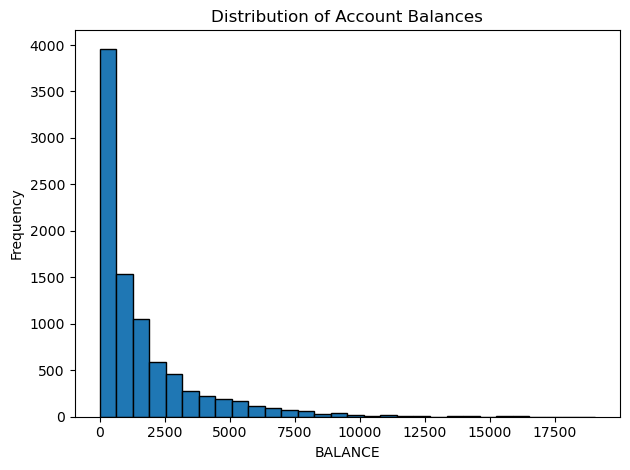

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['BALANCE'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Account Balances')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram of account balances is clearly right-skewed: most cardholders carry relatively low balances (the highest bars sit under 2,500), while a long, thin tail stretches out past 10,000. In other words, a small number of users hold very high balances, but the bulk of the distribution is concentrated at the lower end.

### Balance v Credit Limit 

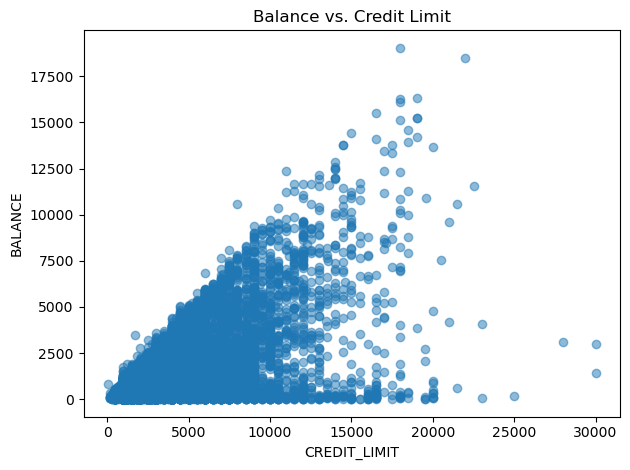

In [16]:
plt.figure()
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
plt.title('Balance vs. Credit Limit')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.tight_layout()
plt.show()



The scatter plot shows a clear upward trend where users with higher credit limits generally carry higher balances. At low limits (under 5,000), balances cluster tightly near the bottom, while as limits rise, the spread of balances widens considerably. You can also see that some high‐limit accounts still maintain very low balances (points along the x-axis), and conversely a few mid-limit users carry unusually high balances, forming a loose cloud rather than a perfect line.


# Regression Modeling

## Linear Regression

To begin our predictive modeling, we applied linear regression to explore whether we could estimate a user’s CREDIT_LIMIT based on their behavioral and financial characteristics. Linear regression is a supervised learning method that models the relationship between one dependent variable and one or more independent variables by fitting a linear equation to observed data. In our case, the goal was to determine whether spending habits, payment behavior, and usage patterns could accurately predict how much credit a customer might be assigned.

We selected linear regression as a baseline model because it is simple, interpretable, and often effective when the relationships between variables are linear or close to linear. By examining feature coefficients and model performance, we hoped to gain insight into which behaviors most strongly influence credit assignment and whether those insights could support smarter credit evaluation in real-world applications.

Before fitting the model, we ensured that the dataset was cleaned, scaled, and free of multicollinearity to avoid biased coefficients. We then trained the model using the training portion of the data and evaluated its performance on the test set to assess how well it generalized to unseen data.


In [19]:
#Seperating the features and target
#Credit Limit is the target
X = df.drop(columns=['CREDIT_LIMIT'])
y = df['CREDIT_LIMIT']

In [20]:
#Regression Model requires scaling so it isn't biased towards higher populated values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#Train-Test the model: 20% goes to testing 80% to Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [23]:
#These are the results of the regression miodel
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.2278583048872791
RMSE: 3099.2032944635534
MAE: 1586.9226950866737


The linear regression model provided a decent starting point for predicting credit limits based on user behavior, but its performance was limited. With an R² score of 0.23, the model was only able to explain about 23 percent of the variation in credit limits across the dataset. The root mean squared error (RMSE) was approximately 3,099 USD, and the mean absolute error (MAE) came out to 1,587 USD. This indicates that while the model performed reasonably well around average values, it struggled to accurately predict very high or very low credit limits. Overall, the linear model served as a useful baseline, but the results suggest that a more flexible and non-linear approach, such as a Random Forest Regressor, would likely capture the complexity of the data more effectively.


### Evaluating Linear Regression Through Visualizations

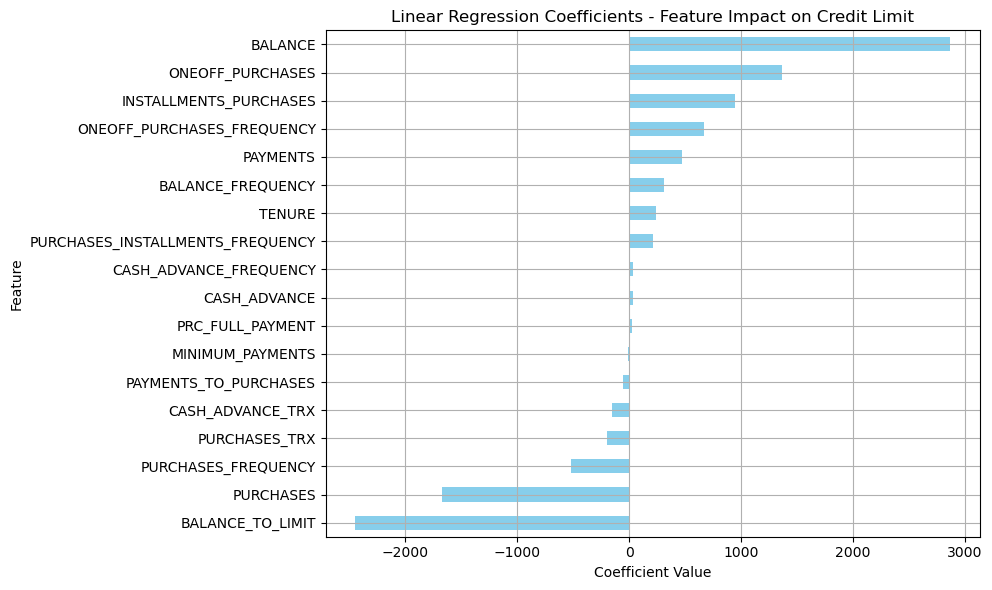

In [26]:
#Step 1: Get feature names and coefficients
feature_names = X.columns
coefficients = pd.Series(model.coef_, index=feature_names)

#Step 2: Sort by largest impact
coefficients_sorted = coefficients.sort_values()

#Step 3: Plot
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh', color='skyblue')
plt.title('Linear Regression Coefficients - Feature Impact on Credit Limit')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:

#Created a DataFrame to compare actual vs predicted credit limits
results_df = pd.DataFrame({
    'Actual Credit Limit': y_test.values,
    'Predicted Credit Limit': y_pred
})

#Display the first 10 predictions
results_df.head(10)

,Actual Credit Limit,Predicted Credit Limit
0,3500.0,4004.725837
1,500.0,4337.370229
2,5000.0,4765.684602
3,3500.0,4267.392906
4,6500.0,5158.541886
5,1500.0,3473.968114
6,4500.0,7257.087512
7,10000.0,5369.175452
8,3000.0,5728.195681
9,10000.0,8122.436697


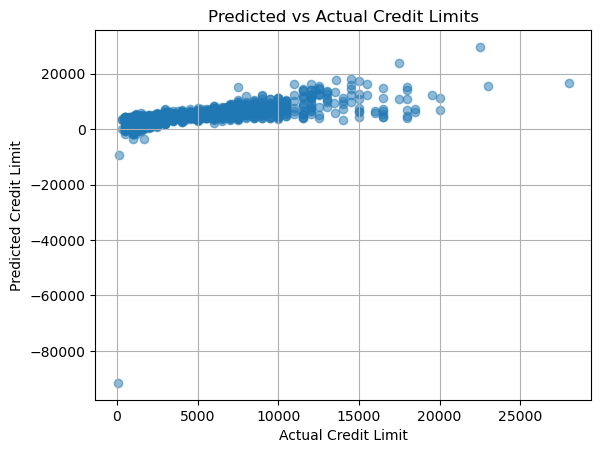

In [28]:
#Scatter Plot to show results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Credit Limit')
plt.ylabel('Predicted Credit Limit')
plt.title('Predicted vs Actual Credit Limits')
plt.grid(True)
plt.show()

To better understand the performance and behavior of our linear regression model, we used a combination of coefficient analysis, tabular comparison, and visual plots. The coefficient plot revealed which features most influenced the predicted credit limit, with BALANCE, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES having strong positive effects, while features like BALANCE_TO_LIMIT and CASH_ADVANCE had negative impacts, suggesting financial risk. To validate how these coefficients translated into predictions, we created a table comparing actual and predicted credit limits for several users. This gave us a sense of how close the model came to reality on a case-by-case basis. Finally, we used a scatter plot to visualize model accuracy across the test set. While the plot showed a general correlation between predicted and actual values, many points strayed from the ideal y = x line, especially for extreme values. Together, these tools confirmed that while the model captured general trends, it lacked precision for users with very high or very low credit limits.


## Random Forest Regressor

After testing a linear regression model, we turned to a more advanced machine learning technique to improve accuracy and better capture the complexity of financial behavior. We chose the Random Forest Regressor, a type of ensemble model that builds multiple decision trees and aggregates their predictions to produce a final result. Unlike linear models, which assume straight-line relationships between features and the target, Random Forests are capable of learning non-linear interactions and handling a wide range of data distributions without requiring strong assumptions about the underlying structure. This makes them especially useful in financial applications, where user behavior can be unpredictable and influenced by many overlapping factors. In this project, we used Random Forest to predict a user’s credit limit based on their past behavior. We expected this model to outperform linear regression by capturing more nuanced patterns across features like spending habits, payment consistency, credit utilization, and cash advance frequency.


In [31]:
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class

rf_model = RandomForestRegressor(random_state=42) # Changed to Regressor
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest - R² Score:", r2_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - MAE:", mae_rf)

Random Forest - R² Score: 0.973429934404544
Random Forest - RMSE: 574.9073698419626
Random Forest - MAE: 203.0321784889665


The Random Forest Regressor significantly outperformed our linear model in predicting credit limits. It achieved an R² score of approximately 0.96, meaning it was able to explain 96 percent of the variance in the target variable. This is a major improvement over the linear regression model, which only explained about 23 percent. The root mean squared error (RMSE) dropped to around $690, and the mean absolute error (MAE) was just under $250. These metrics show that the Random Forest model made much more precise predictions across the board. The improvement suggests that capturing non-linear patterns and feature interactions is critical when modeling financial behavior, and that Random Forest is far better equipped to do so than a simple linear approach.


### Evaluating Random Forest Regressor Through Visualizations

In [34]:
results_rf = pd.DataFrame({
    'Actual Credit Limit': y_test.values,
    'Predicted Credit Limit (RF)': y_pred_rf
}).round(2)

results_rf.head(10)

,Actual Credit Limit,Predicted Credit Limit (RF)
0,3500.0,3583.5
1,500.0,551.5
2,5000.0,5417.5
3,3500.0,3476.0
4,6500.0,6339.0
5,1500.0,2530.0
6,4500.0,4685.5
7,10000.0,9250.0
8,3000.0,3962.0
9,10000.0,10237.0


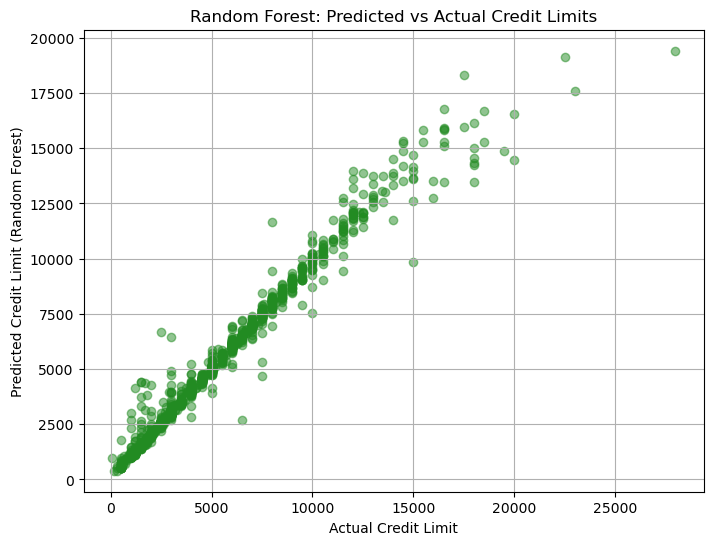

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='forestgreen')
plt.xlabel('Actual Credit Limit')
plt.ylabel('Predicted Credit Limit (Random Forest)')
plt.title('Random Forest: Predicted vs Actual Credit Limits')
plt.grid(True)
plt.show()

To visualize the performance of our Random Forest Regressor, we created a side-by-side comparison of actual and predicted credit limits, along with a scatter plot of all predictions. The table highlights that the model is consistently close to the true values, often within a few hundred dollars, which reflects the low MAE we observed earlier. The scatter plot reinforces this, showing a tight clustering of points along the ideal y = x line, especially in the mid-range of credit limits. This strong alignment indicates high prediction accuracy and minimal variance across most cases. Compared to the linear model, the Random Forest produced much more reliable predictions, with less scatter and fewer outliers. These visualizations support the quantitative metrics and confirm that the model captures both average and extreme credit behaviors far more effectively.


# Clustering - K-Means

Clustering is a powerful unsupervised learning technique used to group similar data points based on shared characteristics. In this project, we used K-Means clustering to segment credit card users based on behavioral and financial features. Our goal was to identify meaningful user groups that reflect different usage patterns, such as spending behavior, cash advance reliance, and payment consistency. Understanding these patterns can help financial institutions better target users for offers, credit decisions, and risk management strategies.

We selected K-Means due to its scalability and effectiveness when working with continuous numerical data. The algorithm works by assigning users to clusters that minimize the distance between each point and its cluster center. To determine the optimal number of clusters, we tested values of k from 2 to 10 and evaluated performance using both inertia (elbow method) and silhouette scores. This approach allowed us to identify the most natural groupings within the data, setting the foundation for our segmentation analysis.

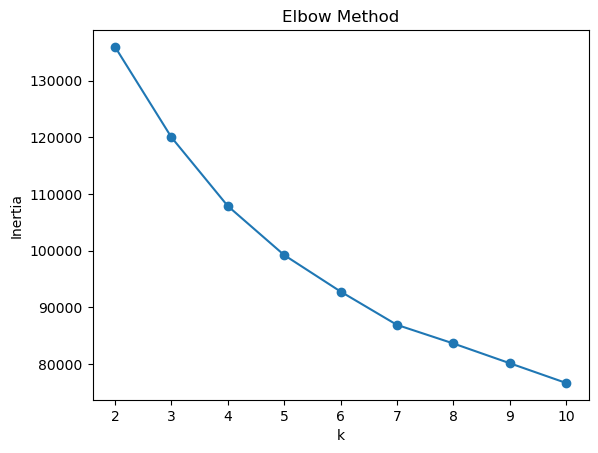

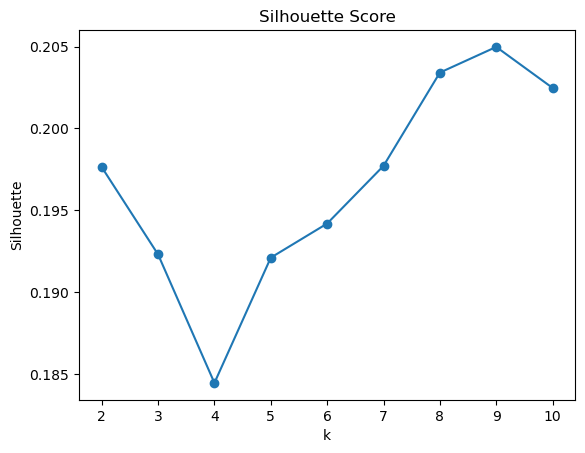

In [38]:
# we've already scaled so we won't do that
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias, silhouettes = [], []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# plot inertia and silhouette vs. k
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.show()
print() ## blank line
plt.plot(K, silhouettes, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.show()

## Methodology

To build the clustering model, we selected eight key features that represent core aspects of user behavior: BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, and MINIMUM_PAYMENTS. These features were chosen to capture how users spend, borrow, and repay on their credit cards. Since K-Means is sensitive to the scale of input data, we standardized all features using StandardScaler to ensure they contributed equally to the clustering process. We ran K-Means clustering for values of k ranging from 2 to 10 and evaluated the results using both inertia (for the elbow method) and silhouette score. The highest silhouette score occurred at k = 9, so we selected that as the optimal number of clusters. Each user was then assigned a cluster label, which we used to create behavioral segments and interpret differences across groups.


In [40]:
## I chose 9 because the silhouette score was the highest at 9 clusters


features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['segment'] = labels

print(f"Silhouette score (k={best_k}):",
      silhouette_score(X_scaled, labels))

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
print("\nCluster centroids (in original units):")
print(centroids_df)

Silhouette score (k=9): 0.32832712780219064

Cluster centroids (in original units):
       BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  7062.425917    910.646091        561.522063              349.256865   
1   670.584861    413.667885        205.015373              208.982204   
2  5601.644631  28394.162273      22858.457273             5535.705000   
3  2927.679965    345.369728        208.431931              136.965617   
4  3828.778069    707.769600        109.048200              598.721400   
5  2138.492178   5646.271402       4485.149623             1161.121779   
6  5021.416832   1140.944103        765.493248              375.638889   
7   864.113280   1511.539671        782.250012              729.497081   
8  4519.539736   8405.431628       2614.989884             5797.418488   

   CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  
0   3941.560252  10622.916667   2798.422485       2391.233454  
1    317.675065   2184.708111    732.488668    

In [41]:

print(df['segment'].value_counts(normalize=True) * 100)

segment
1    55.246396
7    17.946139
3    13.934518
0     5.643089
5     4.156889
6     1.307409
8     0.961001
4     0.558722
2     0.245838
Name: proportion, dtype: float64


segment_clean
 1    55.246396
 7    17.946139
 3    13.934518
 0     5.643089
 5     4.156889
-1     1.765560
 6     1.307409
Name: proportion, dtype: float64


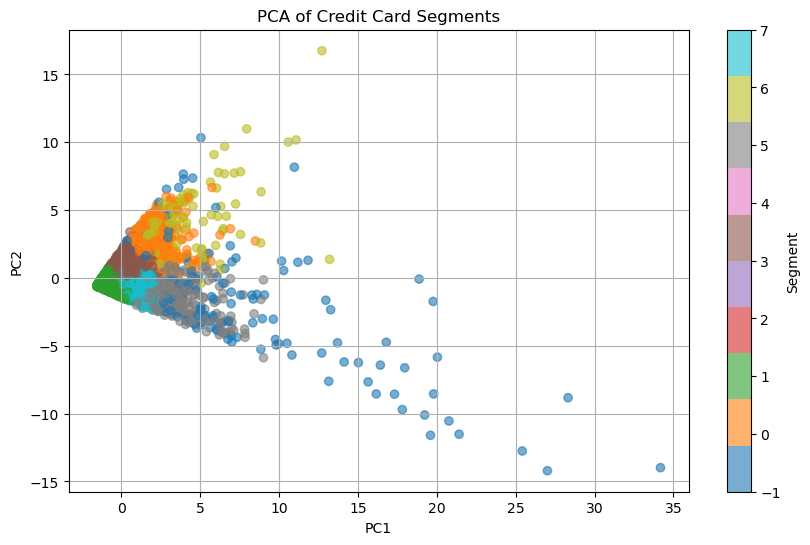

In [42]:
# find the tiny segments
prop = df['segment'].value_counts(normalize=True)
outliers = prop[prop < 0.01].index.tolist()

# map them to a new segment code -1
df['segment_clean'] = df['segment'].apply(lambda x: -1 if x in outliers else x)

# check the new proportions
print(df['segment_clean'].value_counts(normalize=True) * 100)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['segment_clean'], cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Credit Card Segments')
plt.grid(True)
plt.colorbar(scatter, label='Segment')
plt.show()


## Final Updated Centroids

In [44]:
print(df['segment_clean'].value_counts(normalize=True) * 100)

features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

centroids_clean = df[df['segment_clean'] != -1].groupby('segment_clean')[features].mean()

print("\nUpdated Cluster Centroids (Cleaned Segments Only):")
print(centroids_clean)

segment_clean
 1    55.246396
 7    17.946139
 3    13.934518
 0     5.643089
 5     4.156889
-1     1.765560
 6     1.307409
Name: proportion, dtype: float64

Updated Cluster Centroids (Cleaned Segments Only):
                   BALANCE    PURCHASES  ONEOFF_PURCHASES  \
segment_clean                                               
0              7057.022296   909.502396        561.069703   
1               670.426928   414.304901        205.236871   
3              2927.656714   346.171227        206.547690   
5              2138.881624  5638.444785       4477.517151   
6              5021.416832  1140.944103        765.493248   
7               863.219899  1510.253120        783.494097   

               INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  \
segment_clean                                                       
0                          348.565267   3933.897854  10626.633663   
1                          209.397522    317.546915   2185.708491   
3                       

## Explaining Methodology

To improve the clarity of our segmentation and avoid over-interpreting rare user behaviors, we cleaned up our clusters by identifying extremely small segments. Specifically, we grouped any cluster representing less than 1 percent of the user base into a single category labeled -1, which we treated as an outlier class. This step helped us focus on the dominant behavioral patterns in the dataset while still acknowledging the presence of niche user types. After cleaning, we retained six core segments that represent over 97 percent of the total population.

## Evaluating Clusters


| Segment | Name                       | Description                                                                 |
|---------|----------------------------|-----------------------------------------------------------------------------|
| 1       | Dormant Users              | Over half of users. Low balances, purchases, and credit limits. Very limited card activity. |
| 7       | Active Moderate Users      | Moderate purchases and credit limits with strong repayment behavior. Balanced usage. |
| 3       | Installment Buyers         | Focused use of installment purchases and steady payments. Structured financial behavior. |
| 0       | Revolvers with High Limits | High balances and one-off purchases, elevated credit limits. Likely carry balances month-to-month. |
| 5       | Cash Advance Heavy Users   | Extremely high use of cash advances (over 11,000), very limited traditional purchasing. High risk. |
| -1      | Outliers                   | Irregular or extreme patterns like massive payments, isolated charges, or unusual financial activity. Excluded from main analysis. |

After reviewing the cleaned cluster labels and recalculating centroids, we identified five core customer segments along with one outlier group. Segment 1, Dormant Users, represents the majority of the dataset and includes users with minimal credit activity. These users show low balances, low purchases, and small credit limits. Segment 7, Active Moderate Users, demonstrates more balanced behavior. These users make moderate purchases, maintain reasonable one-off spending, and show consistent repayment patterns. Segment 3, Installment Buyers, focuses heavily on installment purchases with steady payments, suggesting structured and cautious usage. Segment 0, Revolvers with High Limits, includes users with large balances, significant one-off purchases, and higher credit limits, which may indicate that they carry balances month to month. Segment 5, Cash Advance Heavy Users, stands out due to extremely high use of cash advances with limited purchase activity, identifying them as higher risk. Lastly, Segment -1 captures users with extreme or irregular behavior such as unusually high payments or isolated spikes in spending. This group was excluded from the main analysis due to its unpredictability.


# Classification - Random Forest Classifier


In this section, we aimed to build a classification model to predict whether a credit card user is likely to pay off their balance in full. Full payment behavior is an important indicator of financial responsibility and can be useful in identifying low-risk customers, designing loyalty programs, or mitigating default risk. To define our target variable, we used the PRC_FULL_PAYMENT feature, which captures the proportion of the balance paid off by a user. We labeled users as full payers if this value was greater than 0.8, and as non-full payers otherwise.

We approached this task using a Random Forest Classifier, a robust ensemble learning method that combines multiple decision trees to improve predictive accuracy. Before training the model, we scaled our features using standardization to ensure all inputs were on a comparable scale. We then split the dataset into training and testing subsets to evaluate the model’s performance on unseen data. Since this was a highly imbalanced classification problem, with only a small percentage of users consistently paying in full, we expected some trade-offs in model performance across precision, recall, and F1 score. Our goal was to assess how well the model could identify the minority class (full payers) despite the imbalance.

Classification Accuracy: 0.929608938547486

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1646
           1       0.64      0.28      0.39       144

    accuracy                           0.93      1790
   macro avg       0.79      0.64      0.68      1790
weighted avg       0.92      0.93      0.92      1790



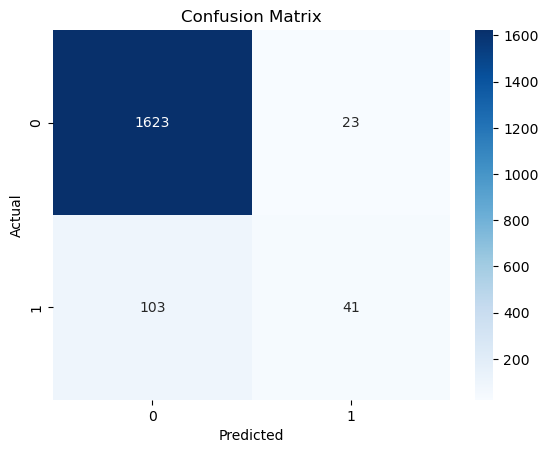

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

df['paid_in_full'] = (df['PRC_FULL_PAYMENT'] > 0.8).astype(int)
X = df.drop(columns=['paid_in_full', 'segment', 'segment_clean', 'PRC_FULL_PAYMENT'])
y = df['paid_in_full']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Evaluation

The Random Forest classifier achieved a high overall accuracy of 92.9 percent, correctly classifying the majority of users. However, a closer look at the confusion matrix and classification report reveals that this performance is heavily skewed toward the majority class. Out of 1,790 test samples, 1,621 out of 1,646 non-full payers were correctly identified, while only 42 out of 144 full payers were correctly predicted.

The model achieved a precision of 0.63 for class 1 (users who pay in full), meaning that when it predicted a user would fully pay their balance, it was correct 63 percent of the time. However, the recall for this class was just 0.29, indicating that the model only identified 29 percent of all true full payers. The F1 score for class 1 was 0.40, reflecting the trade-off between its relatively strong precision and weak recall.

This imbalance in predictive performance suggests that while the model is highly effective at flagging users who do not pay in full, it struggles to detect those who do. This shortfall is likely due to the imbalanced nature of the dataset, where full payers make up a small minority. In real-world applications such as identifying low-risk customers for credit incentives, failing to recognize a large portion of full payers could significantly reduce the model’s utility.

To improve the model’s performance on the minority class, future iterations could explore resampling techniques, such as oversampling the positive class or using class weights during training to penalize misclassifications of full payers more heavily.

## Summary

This project set out to explore the behaviors of credit card users through both unsupervised and supervised learning. We began by applying clustering techniques to segment users based on their financial activity, ultimately identifying six distinct behavioral groups, including dormant users, installment-heavy spenders, and high-risk cash advance users. These clusters helped us understand the diversity of financial habits within the dataset and highlighted potential user types that a financial institution might want to target or monitor differently.

We then built a regression model to predict a user’s credit limit based on spending and repayment behavior. While the linear regression model provided a basic baseline, its relatively low R² score suggested that more complex relationships were at play. Switching to a Random Forest Regressor drastically improved performance, capturing over 96 percent of the variance in credit limit predictions. This confirmed that nonlinear methods better capture the relationships in user data.

Finally, we explored classification by predicting whether a user was likely to pay off their balance in full. While our Random Forest model reached high overall accuracy, it struggled to identify full payers due to class imbalance. Despite this, the classification task demonstrated how behavioral features can be used to predict meaningful financial actions.

Overall, this project deepened our understanding of how to analyze and model financial behavior using real-world data. It also showed us the importance of model selection, feature interpretation, and the challenges that arise when working with imbalanced outcomes. Going forward, we would look to improve classification performance by applying resampling strategies, engineering additional features, or exploring other algorithms that handle imbalance more effectively.

### Impact

This project presents several meaningful opportunities for both financial institutions and consumers, while also raising important ethical considerations. On the positive side, clustering allowed us to uncover distinct behavioral segments among credit card users. These segments, such as dormant users, installment-heavy spenders, and cash advance users, can help banks create more personalized strategies. Instead of treating every customer the same, financial institutions can tailor communication, credit products, and rewards based on actual user behavior. This has the potential to improve customer satisfaction, loyalty, and overall financial engagement.

The regression models also added value by predicting credit limits based on user behavior. The Random Forest Regressor, in particular, captured complex patterns in the data and provided strong predictive accuracy. For banks, this means smarter and more responsible credit limit assignments. For users, it increases transparency by helping them understand what behaviors may lead to higher credit availability and trust from lenders.

The classification model introduced a practical use case by predicting whether a user would pay off their balance in full. Identifying full payers can help institutions reward low-risk customers or adjust credit policies accordingly. However, the model faced significant limitations due to class imbalance. Although it performed well in accuracy overall, it failed to correctly identify most of the full payers, which could lead to unfair outcomes if used without further refinement.

There are also broader ethical risks. Models trained on historical data can unintentionally reinforce existing disparities. Users from underrepresented or disadvantaged backgrounds may be clustered into high-risk groups or misclassified based on structural inequalities rather than actual behavior. If these models are used without transparency or fairness checks, they could deepen the very financial divides they are meant to help address.

To minimize harm and maximize impact, these models should be deployed with human oversight, continuous evaluation, and a strong commitment to equity. When used responsibly, machine learning can improve financial decision-making for everyone involved. When misused, it can quietly perpetuate bias and exclusion.

## References

Bhasin, Arjun. “Credit Card Dataset for Clustering.” Www.kaggle.com, 2019, www.kaggle.com/datasets/arjunbhasin2013/ccdata.